# Name: Khizar Ali
# Roll_NO:22p-9269
# Section:BAI-4A

# Task 1

In [1]:
import math
import pandas as pd

# Calculate Euclidean distance

In [2]:
def Ecu_Distance(x,y):
    distance=0
    for i in range(len(x)):
        distance+=(x[i]-y[i])**2

    return math.sqrt(distance)

# Find nearset node

In [3]:
def find_knode(data,y,k):
    distances=[]
    for i,x in enumerate(data):
        distance=Ecu_Distance(x,y)
        distances.append((i,distance))

    distances.sort(key=lambda x:x[1]) # sort by  the second element of each tuple (the index and the distance)
    return distances[:k]


# Predict

In [4]:
def predcition(neighbors,labels):
    label_count={}
    for neighbor in neighbors:
        index=neighbor[0]
        label=labels[index]
        label_count[label]=label_count.get(label,0)+1

    return max(label_count,key=label_count.get)

In [5]:
df=pd.read_csv("dataset.csv")
data = [[row['Smoke'], row['Lungs Capacity']] for _, row in df.iterrows()]
# print(data)
labels=list(df["Cancer"])
# print(labels)
query_point = [7,5]
k = 3

nearest_neighbors = find_knode(data, query_point, k)
# print(nearest_neighbors)
prediction = predcition(nearest_neighbors, labels)
print(f"{prediction}")

Yes


# TASK 2

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Pre-processing Data

In [7]:
df=pd.read_csv('fruit_data_with_colors _1_.csv')
# print(df)
data = df.select_dtypes(exclude=['object'])
# print("Data without string columns:\n")

data=data.fillna(data.mean())
# display(data)


# Split Data


In [8]:
X=data.drop('fruit_label',axis=1)
# print(X)
y=data['fruit_label']
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

# Apply KNN

In [9]:
k_values=range(1,11)
accuracies=[]

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"Accuracy for K={k} is {accuracy}")
    accuracies.append(accuracy)

Accuracy for K=1 is 0.6666666666666666
Accuracy for K=2 is 0.6111111111111112
Accuracy for K=3 is 0.6111111111111112
Accuracy for K=4 is 0.6111111111111112
Accuracy for K=5 is 0.5
Accuracy for K=6 is 0.4444444444444444
Accuracy for K=7 is 0.5
Accuracy for K=8 is 0.3888888888888889
Accuracy for K=9 is 0.5
Accuracy for K=10 is 0.4444444444444444


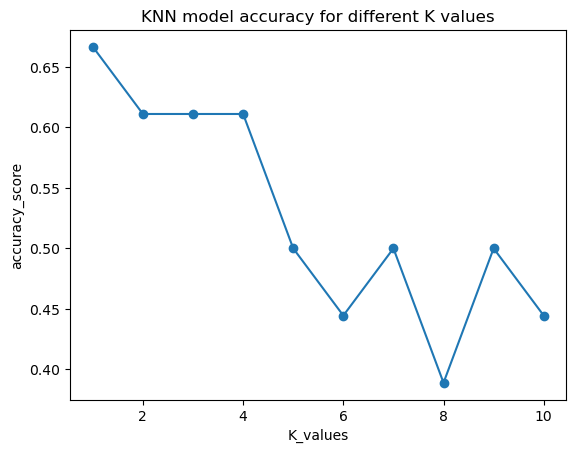

In [10]:
plt.plot(k_values,accuracies,marker='o')
plt.xlabel('K_values')
plt.ylabel('accuracy_score')
plt.title("KNN model accuracy for different K values")
plt.show()